# Подготовка базы данных

In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, distance
from sklearn_extra.cluster import KMedoids
from scipy.cluster import hierarchy
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
data = pd.read_excel("Database_for_cluster.xlsx")

In [8]:
data_to_cluster = data.drop(columns = ["Актор"])

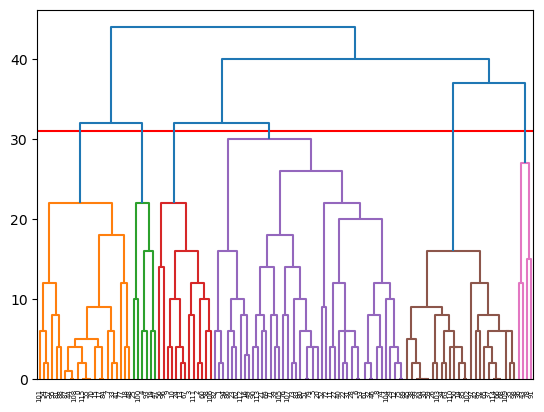

In [44]:
hc2 = linkage(data_to_cluster, method = "complete", metric = "cityblock")
plt.hlines(y = 31, xmin = 0, xmax = 2000, color = "red");
dendrogram(hc2);

In [5]:
clusters_city = cut_tree(hc2, n_clusters = 5).reshape(-1, )

In [6]:
data['clusters_city'] = clusters_city

In [7]:
data['clusters_city'].value_counts()

1    58
3    26
0    22
2     6
4     4
Name: clusters_city, dtype: int64

In [5]:
data.head(10)

,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,...,Отношения “центр - регионы”: степень учёта интересов регионов,"Позиция по изменениям, реформам по направлениям политики",Политическое сотрудничество с разными странами,Политическое участие граждан,Распределение полномочий внутри федеральных органов власти,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество
0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Алимова О. Н.,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,1,1,-1
2,Андрейченко А. В.,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
3,Арефьев Н. В.,-1,-1,1,-1,1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
4,Аршинова А. И.,1,1,-1,1,-1,-1,1,1,1,...,-1,1,1,-1,-1,-1,-1,1,-1,1
5,Афонин Ю. В.,-1,-1,1,1,1,1,-1,-1,1,...,-1,1,1,1,-1,-1,-1,1,1,1
6,Белых И. В.,1,1,1,1,1,1,1,1,-1,...,-1,1,1,1,-1,-1,-1,1,1,1
7,Берулава М. Н.,-1,1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
8,Бессараб С. В.,1,1,1,1,-1,1,1,1,-1,...,-1,1,1,-1,-1,-1,-1,1,1,1
9,Бессарабов Д. В.,1,1,1,-1,1,-1,1,1,-1,...,-1,-1,1,1,-1,-1,-1,-1,-1,1


# Кластеризация по 5 кластерам

In [11]:
kmedoids5 = KMedoids(n_clusters=5, random_state=1234).fit(data_to_cluster)

In [12]:
data['clusters_kmedoids5'] = kmedoids5.labels_

In [13]:
# суммы по тематическим блокам
# характеристики ["count", "mean", "min", "max"] по каждому блоку
# ящики с усами по каждому блоку
# scatterplot блок vs блок
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [14]:
data['ind'] = data.loc[:, 
                       "Возможности для получения высшего образования": "Экономическое международное сотрудничество"].apply(sum, axis = 1)

In [15]:
data.groupby("clusters_kmedoids5")["ind"].agg(["count", "mean", "min", "max"])

,count,mean,min,max
clusters_kmedoids5,,,,
0,29,15.275862,2,22
1,28,4.892857,-4,14
2,17,-9.176471,-16,0
3,28,-14.535714,-22,-4
4,14,2.285714,-4,10


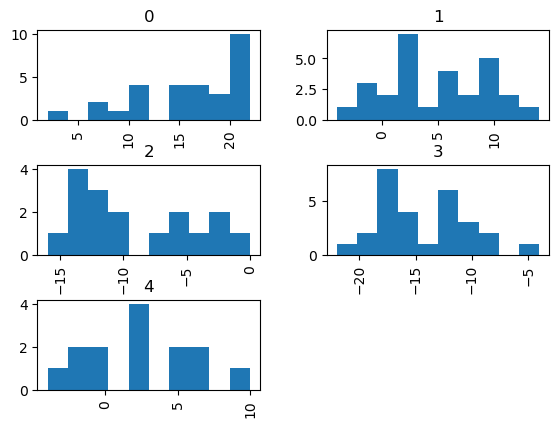

In [16]:
data.hist("ind", by = "clusters_kmedoids5");

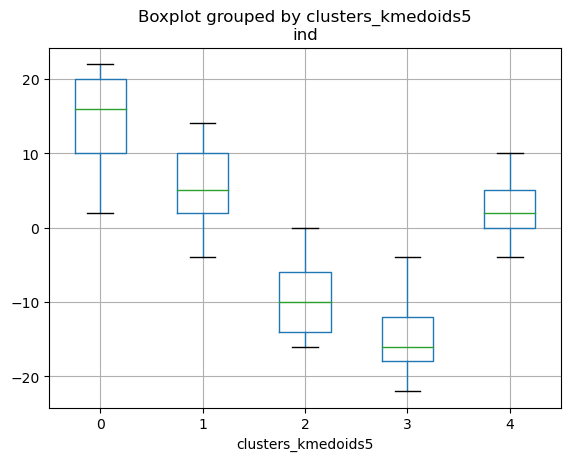

In [17]:
data.boxplot("ind", by = "clusters_kmedoids5");

# Кластеризация по 4 кластерам

In [19]:
kmedoids4 = KMedoids(n_clusters=4, random_state=1234).fit(data_to_cluster)

In [20]:
data['clusters_kmedoids4'] = kmedoids4.labels_

In [22]:
data.groupby("clusters_kmedoids4")["ind"].agg(["count", "mean", "min", "max"])

,count,mean,min,max
clusters_kmedoids4,,,,
0,29,15.275862,2,22
1,31,4.225806,-4,14
2,17,0.470588,-10,10
3,39,-13.666667,-22,-2


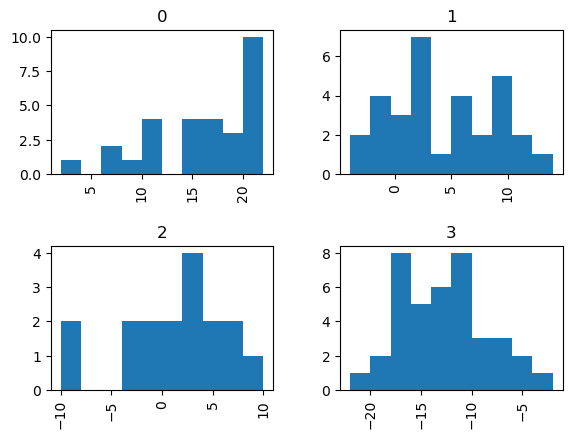

In [23]:
data.hist("ind", by = "clusters_kmedoids4");

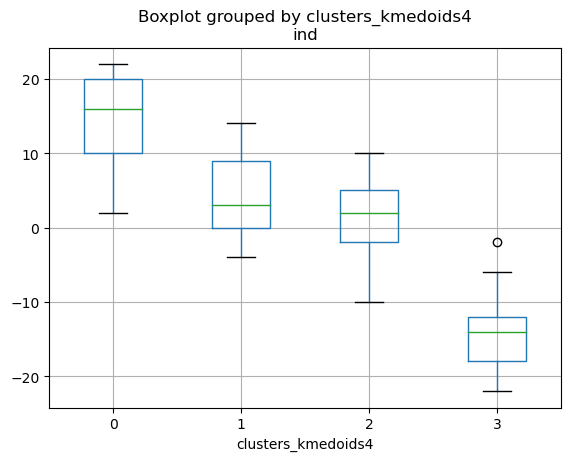

In [24]:
data.boxplot("ind", by = "clusters_kmedoids4");

# Кластеризация по 6 кластерам

In [25]:
kmedoids6 = KMedoids(n_clusters=6, random_state=1234).fit(data_to_cluster)

In [29]:
data['clusters_kmedoids6'] = kmedoids6.labels_

In [30]:
data.groupby("clusters_kmedoids6")["ind"].agg(["count", "mean", "min", "max"])

,count,mean,min,max
clusters_kmedoids6,,,,
0,28,15.750000,6,22
1,26,4.807692,-4,14
2,16,-9.750000,-16,-2
3,28,-14.535714,-22,-4
4,14,2.285714,-4,10
5,4,3.500000,0,10


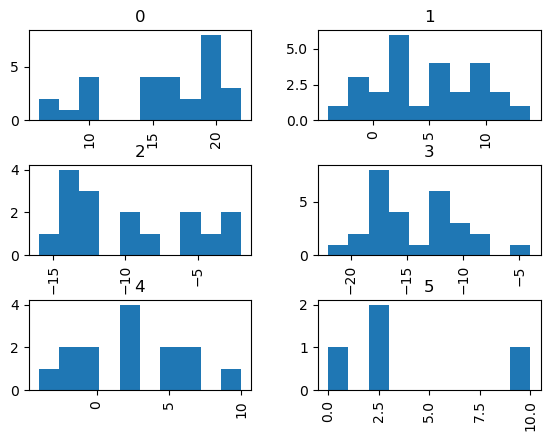

In [34]:
data.hist("ind", by = "clusters_kmedoids6");

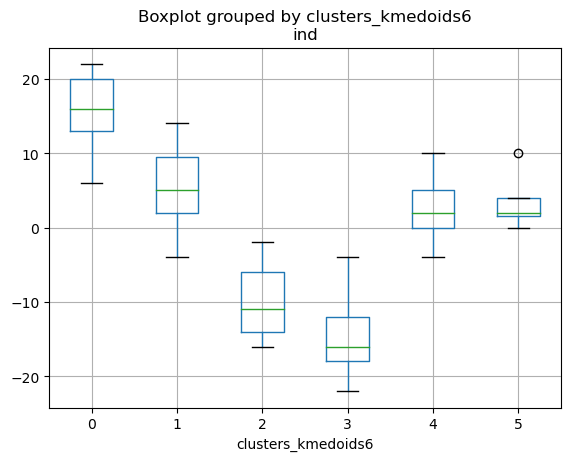

In [33]:
data.boxplot("ind", by = "clusters_kmedoids6");

In [63]:
data.to_csv('cluster_final.csv', encoding = 'utf-8')

# Другие расчеты

In [64]:
data.head(5)

,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,...,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество,clusters_city,ind,clusters_kmedoids5,clusters_kmedoids4,clusters_kmedoids6
0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,0,20,0,0,0
1,Алимова О. Н.,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,1,1,-1,1,-8,3,3,3
2,Андрейченко А. В.,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,1,-14,2,3,2
3,Арефьев Н. В.,-1,-1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,1,1,-10,3,2,3
4,Аршинова А. И.,1,1,-1,1,-1,-1,1,1,1,...,-1,-1,1,-1,1,2,0,2,1,5


In [47]:
def count_ones(x):
    return sum(x == 1)
def count_minus_ones(x):
    return sum(x == -1)
def count_conserve(x):
    return sum(x == 1) - sum(x == -1)

In [48]:
data.groupby("clusters_kmedoids4")[["Возможности для получения высшего образования",
                                   "Грамотность населения"]].agg([count_conserve])

,Возможности для получения высшего образования,Грамотность населения
,count_conserve,count_conserve
clusters_kmedoids4,,
0,25,27
1,19,27
2,-13,-9
3,-7,17


In [49]:
pd.crosstab(data["clusters_kmedoids4"], data["Возможности для получения высшего образования"])

Возможности для получения высшего образования,-1,1
clusters_kmedoids4,,
0,2,27
1,6,25
2,15,2
3,23,16


## Аксиологическое размежевание

In [59]:
data.groupby("clusters_kmedoids5")[['Дихотомия “личность - коллектив” (приоритетность развития)',
                                    'Место исторического нарратива',
                                    'Наиболее общие ценностные приоритеты',
                                    'Отношение к культуре и идентичности',
                                    'Экономическое международное сотрудничество', 
                                    'Политическое сотрудничество с разными странами',
                                    'Позиция по изменениям, реформам по направлениям политики',
                                    'Ценности, связанные с материальным благосостоянием граждан',
                                    'Ценности, связанные с уровнем развития общества'
                                ]].agg([count_ones, count_minus_ones])

Дихотомия “личность - коллектив” (приоритетность развития)  \
                                                                   count_ones   
clusters_kmedoids5                                                              
0                                                                  28           
1                                                                  26           
2                                                                   2           
3                                                                   3           
4                                                                  14           

                                    Место исторического нарратива  \
                   count_minus_ones                    count_ones   
clusters_kmedoids5                                                  
0                                 1                            22   
1                                 2                             8   
2                                15                             5   
3                                25                             6   
4                                 0                            12   

                                    Наиболее общие ценностные приоритеты  \
                   count_minus_ones                           count_ones   
clusters_kmedoids5                                                         
0                                 7                                   28   
1                                20                                   28   
2                                12                                    1   
3                                22                                    3   
4                                 2                                   13   

                                    Отношение к культуре и идентичности  \
                   count_minus_ones                          count_ones   
clusters_kmedoids5                                                        
0                                 1                                  18   
1                                 0                                   7   
2                                16                                   2   
3                                25                                   0   
4                                 1                                   3   

                                     \
                   count_minus_ones   
clusters_kmedoids5                    
0                                11   
1                                21   
2                                15   
3                                28   
4                                11   

                   Экономическое международное сотрудничество  \
                                                   count_ones   
clusters_kmedoids5                                              
0                                                          21   
1                                                          18   
2                                                          12   
3                                                           2   
4                                                          13   

                                     \
                   count_minus_ones   
clusters_kmedoids5                    
0                                 8   
1                                10   
2                                 5   
3                                26   
4                                 1   

                   Политическое сотрудничество с разными странами  \
                                                       count_ones   
clusters_kmedoids5                                                  
0                                                              21   
1                                                              17   
2                                                              12   
3                                             

## Политическое размежевание

In [66]:
data.groupby("clusters_kmedoids5")[['Дихотомия “личность - государство”',
                                    'Западная риторика',
                                    'Идеологическая ориентация аргументов',
                                    'Критика власти',
                                    'Политическое участие граждан'
                                ]].agg([count_ones, count_minus_ones])

Дихотомия “личность - государство”                   \
                                           count_ones count_minus_ones   
clusters_kmedoids5                                                       
0                                                  26                3   
1                                                  23                5   
2                                                   4               13   
3                                                   1               27   
4                                                  10                4   

                   Западная риторика                   \
                          count_ones count_minus_ones   
clusters_kmedoids5                                      
0                                 21                7   
1                                 14               14   
2                                  5               12   
3                                  4               23   
4                                 11                3   

                   Идеологическая ориентация аргументов                   \
                                             count_ones count_minus_ones   
clusters_kmedoids5                                                         
0                                                    28                1   
1                                                    19                8   
2                                                     4               13   
3                                                     0               28   
4                                                    11                3   

                   Критика власти                   \
                       count_ones count_minus_ones   
clusters_kmedoids5                                   
0                              25                4   
1                              21                7   
2                               8                9   
3                               7               21   
4                               1               13   

                   Политическое участие граждан                   
                                     count_ones count_minus_ones  
clusters_kmedoids5                                                
0                                            24                5  
1                                            23                5  
2                                             4               13  
3                                             1               27  
4                                             7                7

## Образовательное размежевание

In [61]:
data.groupby("clusters_kmedoids5")[['Возможности для получения высшего образования',
                                    'Грамотность населения',
                                    'Качество образования',
                                    'Наука - главный приоритет'
                                ]].agg([count_ones, count_minus_ones])

Возможности для получения высшего образования  \
                                                      count_ones   
clusters_kmedoids5                                                 
0                                                             27   
1                                                             22   
2                                                             11   
3                                                              8   
4                                                              2   

                                    Грамотность населения                   \
                   count_minus_ones            count_ones count_minus_ones   
clusters_kmedoids5                                                           
0                                 2                    28                1   
1                                 6                    26                2   
2                                 6                    14                3   
3                                20                    18               10   
4                                12                     3               11   

                   Качество образования                   \
                             count_ones count_minus_ones   
clusters_kmedoids5                                         
0                                    27                2   
1                                    22                6   
2                                    13                4   
3                                     9               19   
4                                     0               14   

                   Наука - главный приоритет                   
                                  count_ones count_minus_ones  
clusters_kmedoids5                                             
0                                         14               15  
1                                         18               10  
2                                          4               13  
3                                         26                2  
4                                          6                6

# Коэффициент силуэта

In [14]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMedoids(n_clusters=n_clusters, random_state=1234)
    cluster_labels = clusterer.fit_predict(data_to_cluster)

    
    silhouette_avg = silhouette_score(data_to_cluster, cluster_labels)
    print(f'Для {n_clusters} кластеров среднее значение коэффициента силуэта: {silhouette_avg:.4f}')

Для 4 кластеров среднее значение коэффициента силуэта: 0.2296
Для 5 кластеров среднее значение коэффициента силуэта: 0.1820
Для 6 кластеров среднее значение коэффициента силуэта: 0.1586


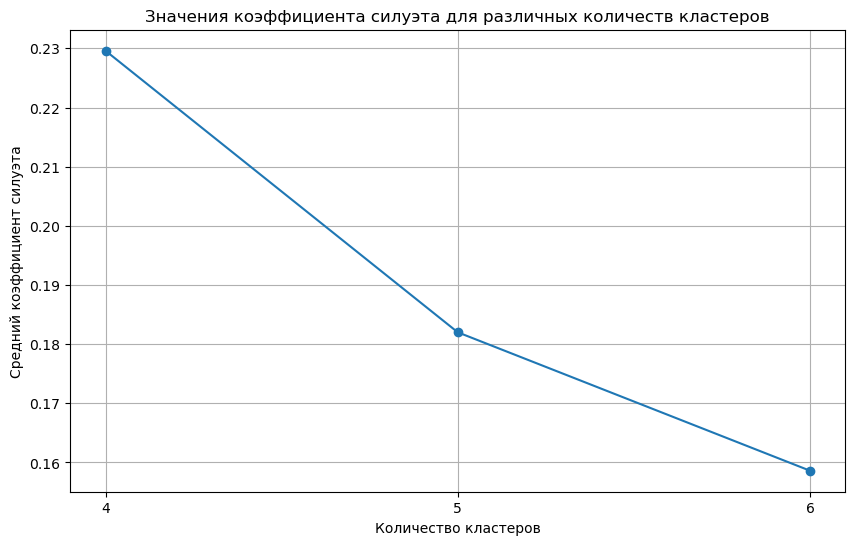

In [10]:
import matplotlib.pyplot as plt

# Значения коэффициента силуэта
silhouette_scores = [0.2296, 0.1820, 0.1586]
num_clusters = [4, 5, 6]

plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Значения коэффициента силуэта для различных количеств кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()